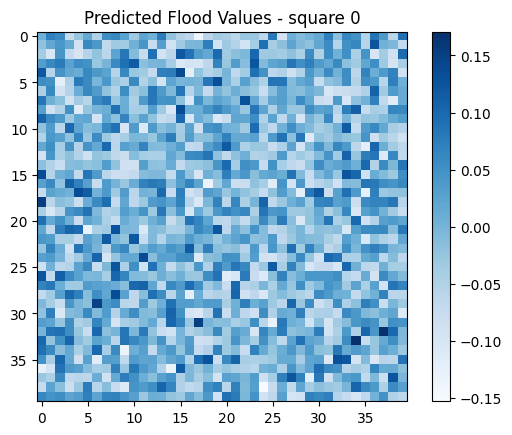

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("yenbai_with_predictions.csv")

# Chuyển dòng đầu tiên về mảng 2D
flat_preds = eval(df["pred_flood_values"].iloc[0])  # List[list[float]]
flat_preds = np.array(flat_preds)
if flat_preds.shape == (1600,):
    flood_map = flat_preds.reshape(40, 40)
else:
    flood_map = flat_preds  # đã là 2D rồi

plt.imshow(flood_map, cmap="Blues")
plt.colorbar()
plt.title("Predicted Flood Values - square 0")
plt.show()


In [2]:
import pandas as pd

# Đọc file bị lỗi với 1 cột duy nhất
with open("yenbai_with_predictions.csv", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip() != ""]

# Chia dòng thành từng cặp: dòng lẻ là ID, dòng chẵn là giá trị
ids = lines[::2]
values = lines[1::2]

# Tạo DataFrame mới
df_fixed = pd.DataFrame({
    "big_square_id": ids,
    "value": values
})

# Lưu lại file mới
df_fixed.to_csv("yenbai_fixed.csv", index=False)

print("✅ Đã sửa lỗi và lưu file thành 'yenbai_fixed.csv'")
print(df_fixed.head())


✅ Đã sửa lỗi và lưu file thành 'yenbai_fixed.csv'
                                       big_square_id  \
0  big_square_id,square_center_lon,square_center_...   
1          [77.13 77.16 77.26 ... 74.6  75.04 74.8 ]   
2                                                ...   
3          [80.38 80.69 80.68 ... 83.18 82.57 82.35]   
4                            [0. 0. 0. ... 0. 0. 0.]   

                                               value  
0  big_0,-2.0078927935261226,-0.6124992596514892,...  
1          [76.32 76.35 76.3  ... 75.85 75.62 75.06]  
2          [78.89 79.1  79.55 ... 81.56 81.55 81.74]  
3  [81.7  82.19 81.55 ... 84.25 83.5  83.17]]",0....  
4                            [0. 0. 0. ... 0. 0. 0.]  


In [3]:
import pandas as pd

# Đọc dữ liệu đã sửa
df = pd.read_csv("yenbai_fixed.csv")

# Đổi tên cột nếu cần
df.rename(columns={"value": "pred_flood_values"}, inplace=True)

# Ép kiểu dữ liệu (nếu cần)
df["pred_flood_values"] = pd.to_numeric(df["pred_flood_values"], errors="coerce")

# Loại bỏ dòng thiếu dữ liệu
df = df.dropna(subset=["pred_flood_values"])

# Tìm top 10 khu vực ngập cao nhất
top_flooded = df.sort_values(by="pred_flood_values", ascending=False).head(10)

# Hiển thị
print("🌊 Top 10 khu vực dự đoán có độ ngập cao nhất:")
print(top_flooded)


🌊 Top 10 khu vực dự đoán có độ ngập cao nhất:
Empty DataFrame
Columns: [big_square_id, pred_flood_values]
Index: []


In [6]:
import pandas as pd
import re
import numpy as np

df = pd.read_csv("yenbai_with_predictions.csv")

def extract_mean_from_text(value):
    try:
        # Lấy toàn bộ số float trong chuỗi (dù có dấu cách, ngắt dòng...)
        numbers = [float(x) for x in re.findall(r'-?\d+\.\d+', str(value))]
        if numbers:
            return float(np.mean(numbers))
        return None
    except Exception as e:
        return None

df["pred_flood_score"] = df["pred_flood_values"].apply(extract_mean_from_text)

top_flooded = df[["big_square_id", "pred_flood_score"]].dropna().sort_values(
    by="pred_flood_score", ascending=False).head(10)

print("\n🌊 Top 10 khu vực dự đoán có độ ngập cao nhất:")
print(top_flooded)



🌊 Top 10 khu vực dự đoán có độ ngập cao nhất:
   big_square_id  pred_flood_score
57        big_57          0.011078
34        big_34          0.008466
53        big_53          0.008158
45        big_45          0.007684
75        big_75          0.007348
36        big_36          0.007169
35        big_35          0.006939
49        big_49          0.006731
55        big_55          0.006716
30        big_30          0.006712


In [7]:
import plotly.express as px

fig = px.scatter_mapbox(
    df.sort_values(by="pred_flood_score", ascending=False).head(10),
    lat="square_center_lat",
    lon="square_center_lon",
    color="pred_flood_score",
    size="pred_flood_score",
    hover_name="big_square_id",
    color_continuous_scale="YlOrRd",
    mapbox_style="carto-positron",
    zoom=10,
    title="Top 10 khu vực dự đoán có độ ngập cao nhất"
)
fig.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_8576\2861003683.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [8]:
import pandas as pd
import ast

# Đọc file CSV
df = pd.read_csv("yenbai_with_predictions.csv")

# Chuyển các chuỗi list thành numpy array và tính giá trị trung bình
def parse_and_avg(val):
    try:
        array = ast.literal_eval(val)
        return float(pd.Series(array).explode().astype(float).mean())
    except:
        return None

# Tính trung bình flood_values và pred_flood_values nếu cần
df["flood_values_avg"] = df["flood_values"].apply(parse_and_avg)
df["pred_flood_values_avg"] = df["pred_flood_values"].apply(parse_and_avg)

# Hoặc nếu bạn đã tính pred_flood_score rồi thì dùng luôn:
df["pred_flood_score"] = df["pred_flood_values_avg"]  # giữ tên mới cho thống nhất

# Chọn cột cần giữ lại
clean_df = df[[
    "big_square_id",
    "square_center_lon",
    "square_center_lat",
    "rainfall_3d", "rainfall_7d", "rainfall_1m",
    "water_presence", "permanent_water",
    "flood_values_avg", "pred_flood_score"
]].rename(columns={
    "flood_values_avg": "flood_value_mean",
    "pred_flood_score": "pred_flood_score"
})

# Xuất ra file mới
clean_df.to_csv("yenbai_clean_predictions.csv", index=False)
